# Recreating de Boer (2000)

In the previous notebook, `1_implementing_de_boer_2000.ipynb`, we implemented the classes needed to run the experimetns performed by de Boer(2000).
We extracted these classes to the `imitationGameClasses.py` file.
We will now use these classes to recreate the games results from by de Boer (2000).

**Reference**: de Boer, B. (2000). Self-organization in vowel systems. *In Journal of Phonetics (Vol. 28, Issue 4, pp. 441–465)*. Elsevier BV. https://doi.org/10.1006/jpho.2000.0125

<hr>
<hr>

## Table of contents

- Student information
- Required imports
- Emergence of a vowel system
   - Parameters inferred from the paper
   - Optimized parameters for thighter and more clusters
- Evaluation of the emerged vowel system
- Sensitivity to parameter changes
   - Acoustic noise impact
   - Effective second formant weight impact
   - Population size impact

<hr>
<hr>

## Student information

- **Name**: Bontinck Lennert
- **Student ID**: 568702
- **Affiliation**: VUB - Master Computer Science: AI

<hr>
<hr>

## Required imports

Below we import the required things for this notebook.

In [1]:
# Import imitation game classes made in the previous notebook
from imitationGameClasses import Synthesizer, BarkOperator, GameEngine, Statistics;

# Used for saving and loading variables
import pickle;

# Used for easier numerical operations
import numpy as np;
import math

<hr>
<hr>

## Emergence of a vowel system

Below we will recreate de Boer's (2000) first experiment.
The results from this experiment are depicted in figure 4 of the report.

### Parameters inferred from the paper

We will start of by performing an expirement using the parameters that were inferred after reading the paper.

In [2]:
if False: # Use saved result per default
    # Use provided variables to configure game
    number_of_agents = 20;
    iterations = 10000;

    agent_phoneme_step_size = 0.1;
    agent_sound_threshold_game = 0.5;
    agent_sound_threshold_self = 0.7;
    agent_sound_minimum_tries = 5;
    agent_new_sound_probability = 0.01;

    max_noise_ambient = 0.1;

    critical_distance = 3.5;
    second_formant_weight = 0.3;


    synthesizer = Synthesizer(max_noise_ambient = max_noise_ambient);
    bark_operator = BarkOperator(critical_distance = critical_distance, second_formant_weight = second_formant_weight);
    game_engine = GameEngine(number_of_agents= number_of_agents, iterations= iterations,
                                synthesizer= synthesizer, bark_operator= bark_operator, 
                                agent_phoneme_step_size= agent_phoneme_step_size,
                                agent_sound_threshold_game= agent_sound_threshold_game,
                                agent_sound_threshold_self= agent_sound_threshold_self,
                                agent_sound_minimum_tries= agent_sound_minimum_tries,
                                agent_new_sound_probability= agent_new_sound_probability);

    # Play the game the game engine was configured for
    checkpoints = [20, 500, 2000, 10000];
    game_states = game_engine.play_imitation_game(checkpoints);

    # Store result to file
    with open("saved_variables/2/2-de_boer_parameters.pickle", 'wb') as f:
        pickle.dump(game_states, f);


    # Delete unused variables
    del number_of_agents;
    del iterations;
    del agent_phoneme_step_size;
    del agent_sound_threshold_game;
    del agent_sound_threshold_self;
    del agent_sound_minimum_tries;
    del agent_new_sound_probability;
    del max_noise_ambient;
    del critical_distance;
    del second_formant_weight;
    del synthesizer;
    del bark_operator;
    del game_engine;
    del checkpoints;
    del game_states;
    del f;

In [3]:
# Get saved experiment result from file
with open("saved_variables/2/2-de_boer_parameters.pickle", 'rb') as f:
    game_states = pickle.load(f);

# Delete unused variables
del f;

#### Plotting the results

Having played the games using the parameters we inferred from the paper we can plot the results.

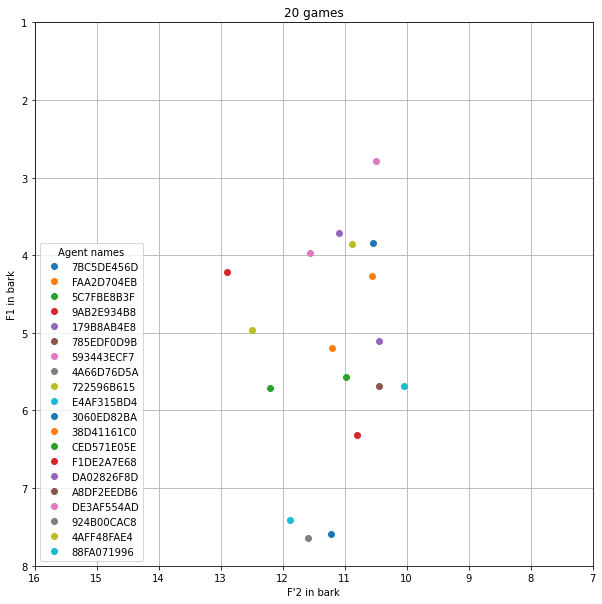

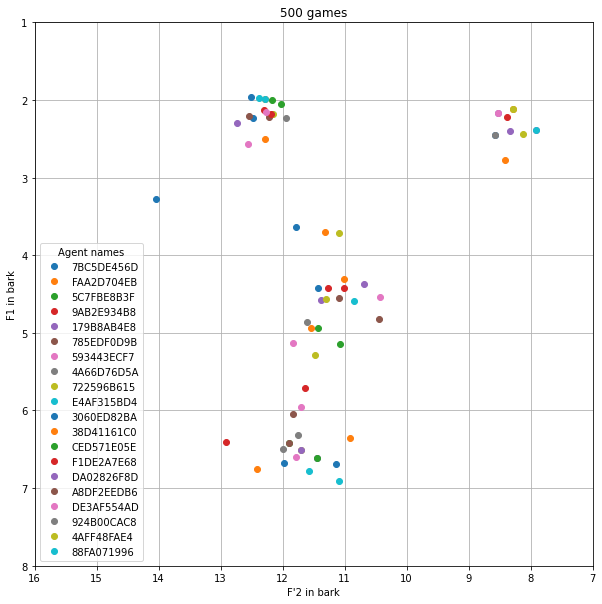

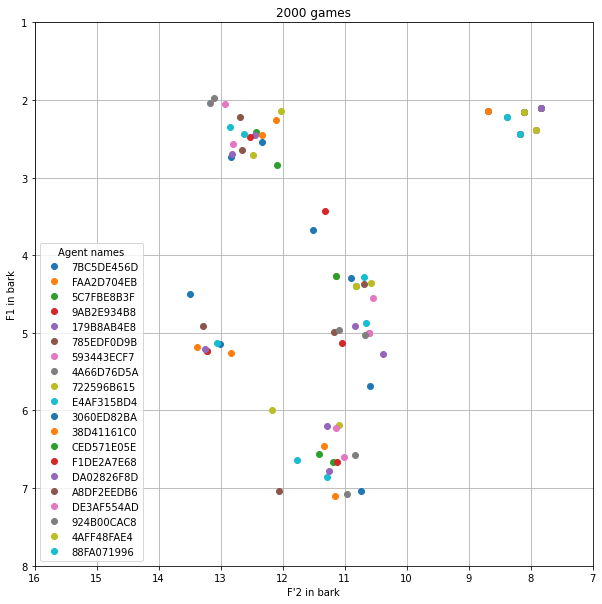

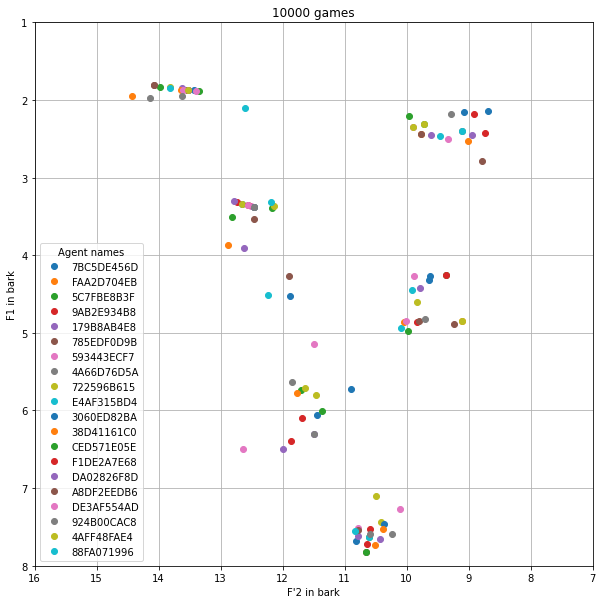

In [4]:
for game_state in game_states:
    game_state.plot();

# Delete unused variables
del game_state

#### Discussing the results

We can see that the clue of the plots is the same as disccuse in the paper.
Namely, in the first 20 games not that many sounds exist and they are randomly distributed.
In the 500th game a clustering has started to appear but there still aren't that many vowels, different clusters.
Going furhter more sounds are introduced, which makes it take longer for the clusters to occur.
In the end we have multiple clusters, often around 5.

After repeating the experiment a couple of times we find it to be not that stable, the amount of clusters can differ strongly and sometimes the emergence is lost in the final plot.
The clusters also seem larger then the ones from the paper.
We will try to alter the parameters to more closely represent the resulst shown in the paper.

This concludes the expirement, we will now remove the results obtained.

In [5]:
# Delete unused variables
del game_states

<hr>

### Optimized parameters for thighter and more clusters

We will perform the same experiment as before with slightly altered parameters to make the results more comparable to those in the paper and more stable.
We think the fact that the clusters are larger then they appear in the paper is due to the phenome step size of 0.1.
Since the vowels start from a random state, it can be that the highest precision due to improvement still differs 0.5 for each parmeter of the phenome.
We thus shrink this step size.
If this causes the clusters to be thighter it will most likely also lead to larger sound repetoires for the agents.

In [6]:
if False: # Use previous results per default
    # Use provided variables to configure game
    number_of_agents = 20;
    iterations = 10000;

    agent_phoneme_step_size = 0.025; # Modified from 0.1
    agent_sound_threshold_game = 0.5;
    agent_sound_threshold_self = 0.7;
    agent_sound_minimum_tries = 5;
    agent_new_sound_probability = 0.01;

    max_noise_ambient = 0.1;

    critical_distance = 3.5;
    second_formant_weight = 0.3;


    synthesizer = Synthesizer(max_noise_ambient = max_noise_ambient);
    bark_operator = BarkOperator(critical_distance = critical_distance, second_formant_weight = second_formant_weight);
    game_engine = GameEngine(number_of_agents= number_of_agents, iterations= iterations,
                                synthesizer= synthesizer, bark_operator= bark_operator, 
                                agent_phoneme_step_size= agent_phoneme_step_size,
                                agent_sound_threshold_game= agent_sound_threshold_game,
                                agent_sound_threshold_self= agent_sound_threshold_self,
                                agent_sound_minimum_tries= agent_sound_minimum_tries,
                                agent_new_sound_probability= agent_new_sound_probability);

    # Play the game the game engine was configured for
    checkpoints = [20, 500, 2000, 10000];
    game_states = game_engine.play_imitation_game(checkpoints);

    # Store result to file
    with open("saved_variables/2/2-thighter_clusters.pickle", 'wb') as f:
        pickle.dump(game_states, f);


    # Delete unused variables
    del number_of_agents;
    del iterations;
    del agent_phoneme_step_size;
    del agent_sound_threshold_game;
    del agent_sound_threshold_self;
    del agent_sound_minimum_tries;
    del agent_new_sound_probability;
    del max_noise_ambient;
    del critical_distance;
    del second_formant_weight;
    del synthesizer;
    del bark_operator;
    del game_engine;
    del checkpoints;
    del game_states;
    del f;

In [7]:
# Get saved experiment result from file
with open("saved_variables/2/2-thighter_clusters.pickle", 'rb') as f:
    game_states = pickle.load(f);

# Delete unused variables
del f;

#### Plotting the results

Having played the games using the parameters we inferred from the paper we can plot the results.

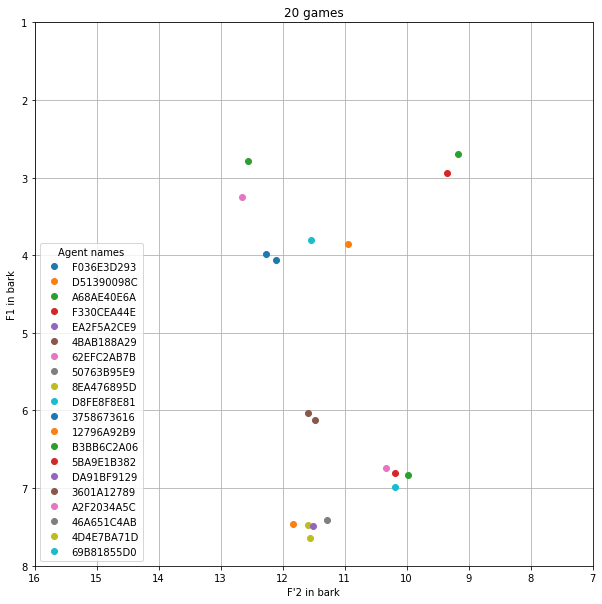

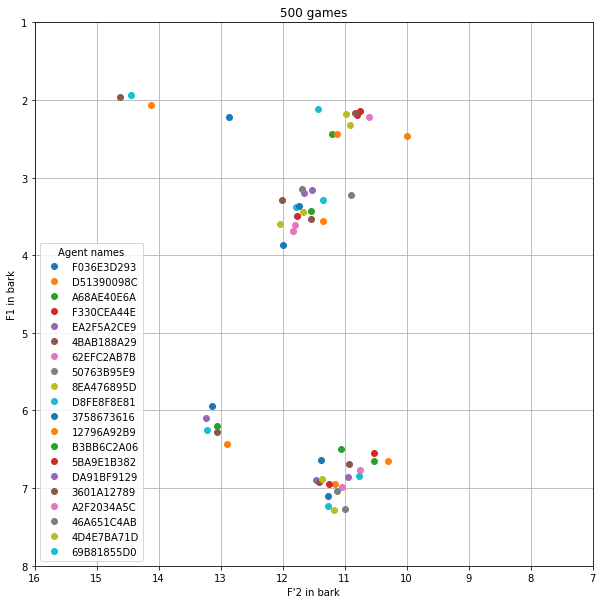

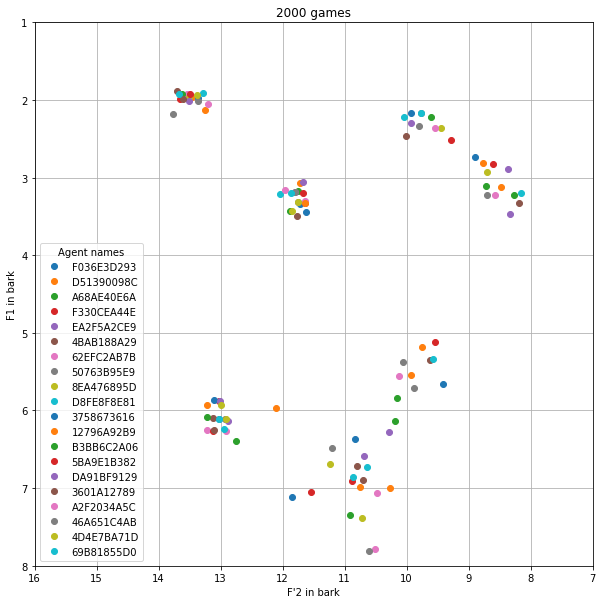

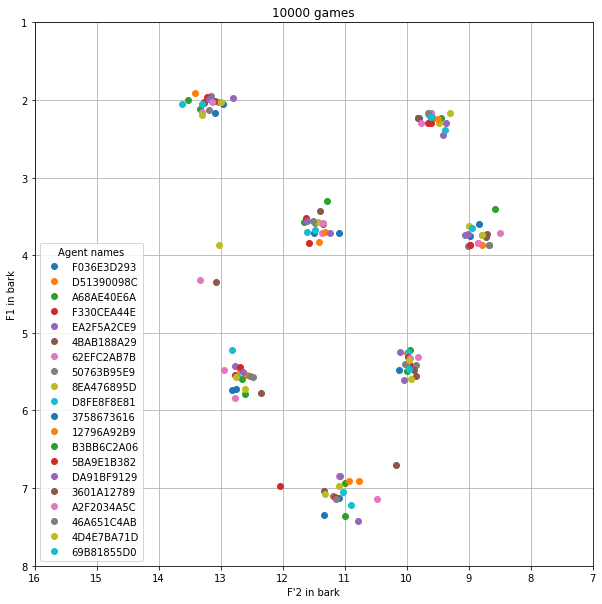

In [8]:
for game_state in game_states:
    game_state.plot();

# Delete unused variables
del game_state

#### Discussing the results

We can see that the clusters are now indeed thighter and the agents have a larger sound repetoire.
Thus, our assumption of the parameter change was correct.
The experiment results are also more stable now.

This concludes the expirement, we will now remove the results obtained.

In [9]:
# Delete unused variables
del game_states

<hr>
<hr>

## Evaluation of the emerged vowel system

De boer performed his evaluation using 1000 games for averaging and only 5000 iterations per game compared to the original 10000.
It is noted that his figure shows a double average, it averages for example the vowel size for each agent of a game, and then averages those averages to get the total average and standard deviation.
The figure thus show the average of the success ratio, sound repetoire size and energy of the agents per game.

In [10]:
if False: # Long execution disabled by default
    trials = 1000;
    results = [None] * trials;

    # Use best matching result variables to configure game
    number_of_agents = 20;
    iterations = 5000;

    agent_phoneme_step_size = 0.025; # Modified from 0.1
    agent_sound_threshold_game = 0.5;
    agent_sound_threshold_self = 0.7;
    agent_sound_minimum_tries = 5;
    agent_new_sound_probability = 0.01;

    max_noise_ambient = 0.1;

    critical_distance = 3.5;
    second_formant_weight = 0.3;

    synthesizer = Synthesizer(max_noise_ambient = max_noise_ambient);
    bark_operator = BarkOperator(critical_distance = critical_distance, second_formant_weight = second_formant_weight);

    # Perform 100 trials
    for trial in range(trials):
        # Create new game engine
        game_engine = GameEngine(number_of_agents= number_of_agents, iterations= iterations,
                                    synthesizer= synthesizer, bark_operator= bark_operator, 
                                    agent_phoneme_step_size= agent_phoneme_step_size,
                                    agent_sound_threshold_game= agent_sound_threshold_game,
                                    agent_sound_threshold_self= agent_sound_threshold_self,
                                    agent_sound_minimum_tries= agent_sound_minimum_tries,
                                    agent_new_sound_probability= agent_new_sound_probability);

        # Only save final result
        checkpoints = [iterations];

        # Save result
        results[trial] = game_engine.play_imitation_game(checkpoints)[0];

        # Print progress
        print(f"Just completed trial: {trial}", end='\r');

    # Store result to file
    with open("saved_variables/2/2-evaluation_of_emerged_vowel_system.pickle", 'wb') as f:
        pickle.dump(results, f);

    # Delete unused variables
    del number_of_agents;
    del iterations;
    del agent_phoneme_step_size;
    del agent_sound_threshold_game;
    del agent_sound_threshold_self;
    del agent_sound_minimum_tries;
    del agent_new_sound_probability;
    del max_noise_ambient;
    del critical_distance;
    del second_formant_weight;
    del synthesizer;
    del bark_operator;
    del game_engine;
    del checkpoints;
    del trial;
    del trials;
    del results;
    del f;

In [11]:
# Get saved experiment result from file
with open("saved_variables/2/2-evaluation_of_emerged_vowel_system.pickle", 'rb') as f:
    results = pickle.load(f);

# Delete unused variables
del f;

Average and standard deviation of success ratio from agents:  [0.9344071244982461, 0.01895010548433572]
Average and standard deviation of sound repetoires size from agents:  [6.253150000000001, 0.6610579229538059]
Average and standard deviation of energy from agents:  [6.974378020642234, 1.833704279011583]


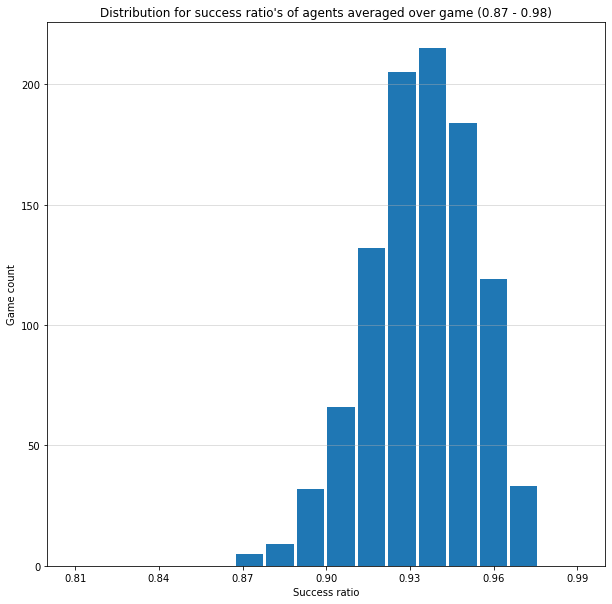

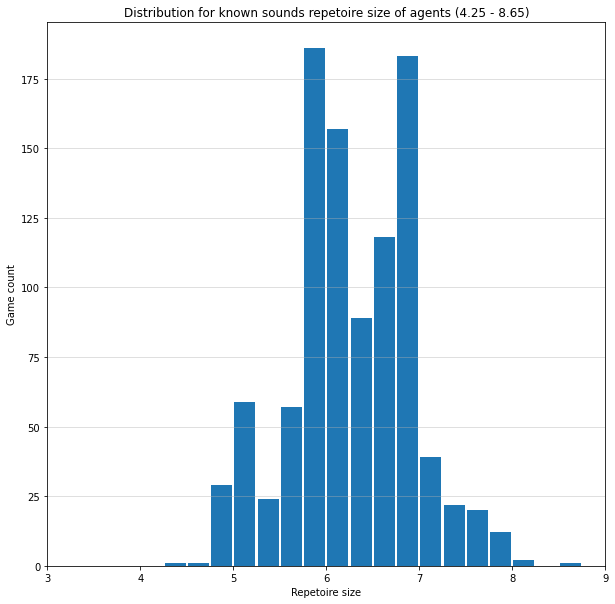

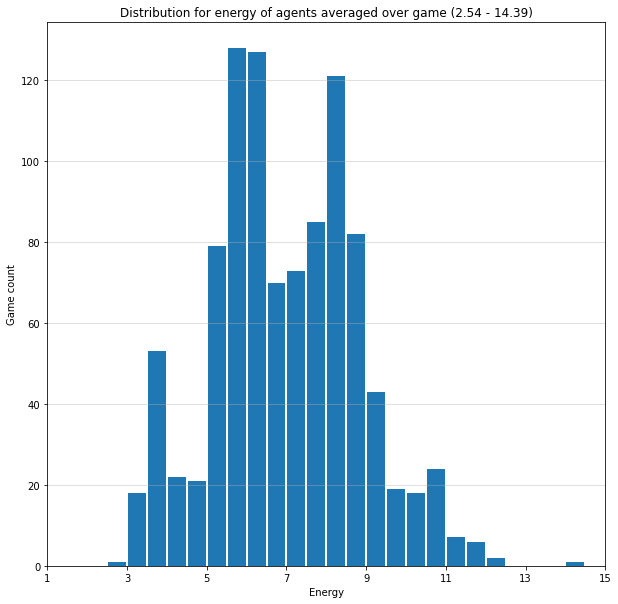

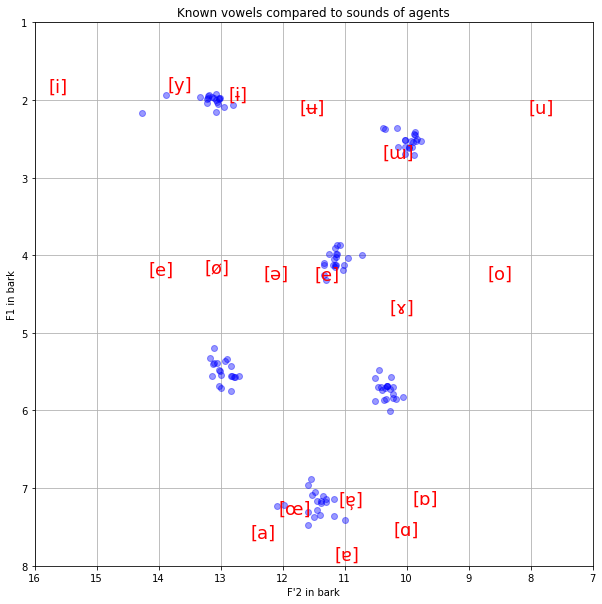

In [12]:
statistics = Statistics(bark_operator= BarkOperator());


print("Average and standard deviation of success ratio from agents: ", statistics.average_agent_success_ratio(results));
print("Average and standard deviation of sound repetoires size from agents: ", statistics.average_agent_sound_size(results));
print("Average and standard deviation of energy from agents: ", statistics.average_agent_energy(results));


statistics.plot_agent_success_ratio_distribution(results);
statistics.plot_agent_sound_size_distribution(results);
statistics.plot_agent_energy_distribution(results);

statistics.plot_known_vowels_over_sounds(results[0]);

# clear unused variables
del statistics;

<hr>
<hr>

## Sensitivity to parameter changes

In what follows we will perform the same test as de Boer (2000) to test the impact of important parameters.
This is done as follows:
- Change acoustic noise parameter to following, saving last of 5000 iterations over 100 trials:
   - 0%
   - 5%
   - 10%
   - 15%
   - 20%
- Change effective second formant weight parameter to following, saving last of 5000 iterations over 100 trials:
   - 0.1
   - 0.2
   - 0.3
   - 0.5
   - 0.7
   - 1.0
- Change population size and related parameters as follows:
   - 2 agents | 0.1 change semi-random sound add | 500 iterations
   - 5 agents | 0.04 change semi-random sound add | 1250 iterations
   - 10 agents | 0.02 change semi-random sound add | 2500 iterations
   - 20 agents | 0.01 change semi-random sound add | 5000 iterations
   - 50 agents | 0.004 change semi-random sound add | 12500 iterations
   - 100 agents | 0.002 change semi-random sound add | 25000 iterations

<hr>

### Acoustic noise impact

- Change acoustic noise parameter to following, saving last of 5000 iterations over 100 trials:
   - 0%
   - 5%
   - 10%
   - 15%
   - 20%

In [13]:
if False: # Use provided result per default
    noise_parameters = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25];

    for noise in noise_parameters:
        trials = 100;
        results = [None] * trials;

        # Use best matching result variables to configure game
        number_of_agents = 20;
        iterations = 5000;

        agent_phoneme_step_size = 0.025; # Modified from 0.1
        agent_sound_threshold_game = 0.5;
        agent_sound_threshold_self = 0.7;
        agent_sound_minimum_tries = 5;
        agent_new_sound_probability = 0.01;

        max_noise_ambient = noise; # Use noise variation

        critical_distance = 3.5;
        second_formant_weight = 0.3;

        synthesizer = Synthesizer(max_noise_ambient = max_noise_ambient);
        bark_operator = BarkOperator(critical_distance = critical_distance, second_formant_weight = second_formant_weight);

        # Perform 100 trials
        for trial in range(trials):
            # Create new game engine
            game_engine = GameEngine(number_of_agents= number_of_agents, iterations= iterations,
                                        synthesizer= synthesizer, bark_operator= bark_operator, 
                                        agent_phoneme_step_size= agent_phoneme_step_size,
                                        agent_sound_threshold_game= agent_sound_threshold_game,
                                        agent_sound_threshold_self= agent_sound_threshold_self,
                                        agent_sound_minimum_tries= agent_sound_minimum_tries,
                                        agent_new_sound_probability= agent_new_sound_probability);

            # Only save final result
            checkpoints = [iterations];

            # Save result
            results[trial] = game_engine.play_imitation_game(checkpoints)[0];

            # Print progress
            print(f"Just completed trial: {trial + 1} for noise {noise}     ", end='\r');

        # Store result to file
        with open(f"saved_variables/2/noise-testing/2-noise-{noise}.pickle", 'wb') as f:
            pickle.dump(results, f);

        # Delete unused variables
        del number_of_agents;
        del iterations;
        del agent_phoneme_step_size;
        del agent_sound_threshold_game;
        del agent_sound_threshold_self;
        del agent_sound_minimum_tries;
        del agent_new_sound_probability;
        del max_noise_ambient;
        del critical_distance;
        del second_formant_weight;
        del synthesizer;
        del bark_operator;
        del game_engine;
        del checkpoints;
        del trial;
        del trials;
        del results;
        del f;

    # Delete unused variables
    del noise;
    del noise_parameters;

We now open the files of the above performed expiriments and plot a sample game together with the statistics.

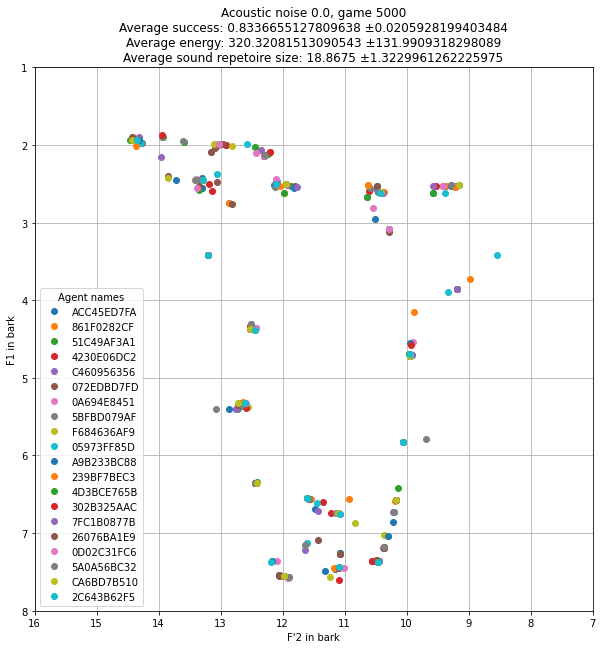

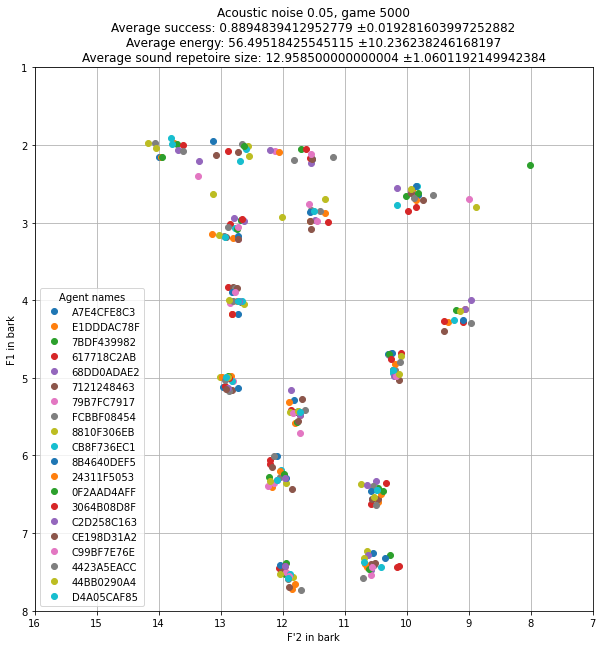

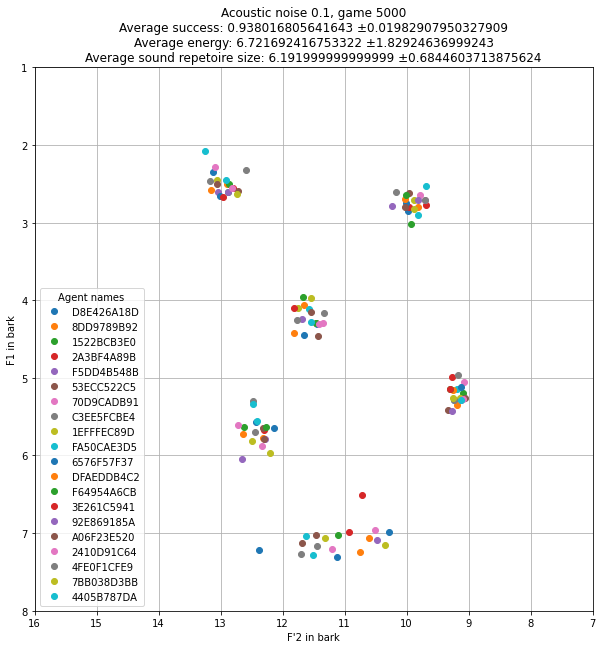

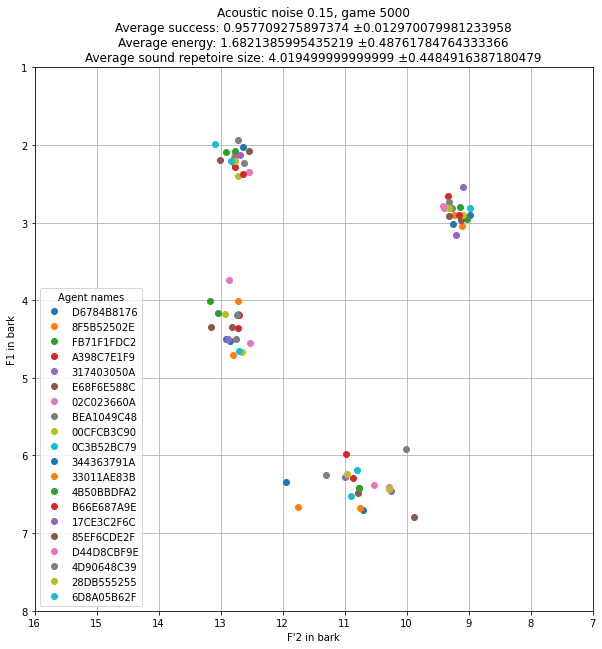

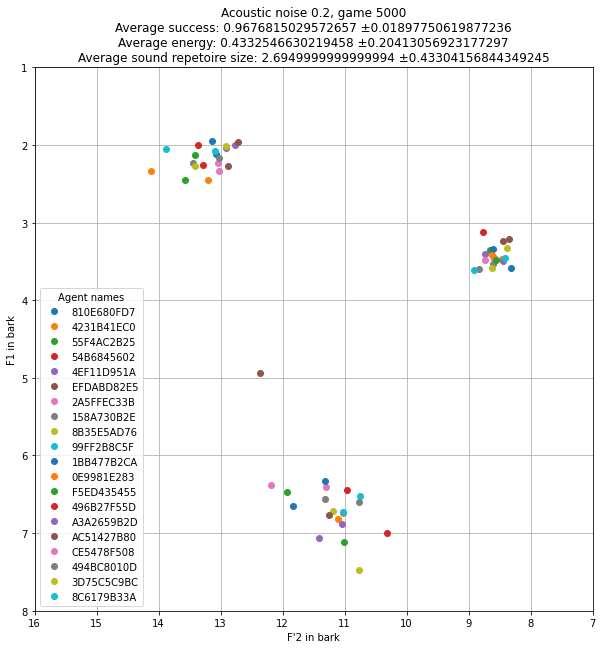

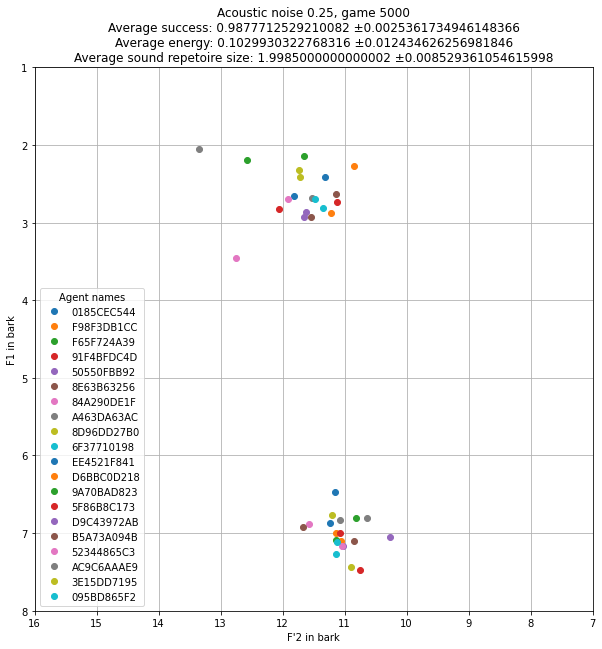

In [14]:
noise_parameters = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25];
statistics = Statistics(bark_operator= BarkOperator());

for noise in noise_parameters:
    # Get saved experiment result from file
    with open(f"saved_variables/2/noise-testing/2-noise-{noise}.pickle", 'rb') as f:
        results = pickle.load(f);

    # Get success, vowel size and energy mean + std
    [avg_success, std_success] = statistics.average_agent_success_ratio(results);
    [avg_sound_size, std_sound_size] = statistics.average_agent_sound_size(results);
    [avg_energy, std_energy] = statistics.average_agent_energy(results);

    # Plot Game state with statistics title
    sample = 33;
    results[sample].plot(f"Acoustic noise {noise}, game {results[sample].iteration}\nAverage success: {avg_success} ±{std_success}\nAverage energy: {avg_energy} ±{std_energy}\nAverage sound repetoire size: {avg_sound_size} ±{std_sound_size}");




# Delete unused variables
del f;
del noise_parameters;
del noise;
del statistics;
del avg_success;
del avg_energy;
del avg_sound_size;
del std_success;
del std_sound_size;
del std_energy;
del results;
del sample;

<hr>

### Effective second formant weight impact

- Change effective second formant weight parameter to following, saving last of 5000 iterations over 100 trials:
   - 0.1
   - 0.2
   - 0.3
   - 0.5
   - 0.7
   - 1.0

In [15]:
if False:
    second_formant_weight_parameters = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0];

    for second_formant_weight_parameter in second_formant_weight_parameters:
        trials = 100;
        results = [None] * trials;

        # Use best matching result variables to configure game
        number_of_agents = 20;
        iterations = 5000;

        agent_phoneme_step_size = 0.025; # Modified from 0.1
        agent_sound_threshold_game = 0.5;
        agent_sound_threshold_self = 0.7;
        agent_sound_minimum_tries = 5;
        agent_new_sound_probability = 0.01;

        max_noise_ambient = 0.1;

        critical_distance = 3.5;
        second_formant_weight = second_formant_weight_parameter; # Test differing 

        synthesizer = Synthesizer(max_noise_ambient = max_noise_ambient);
        bark_operator = BarkOperator(critical_distance = critical_distance, second_formant_weight = second_formant_weight);

        # Perform 100 trials
        for trial in range(trials):
            # Create new game engine
            game_engine = GameEngine(number_of_agents= number_of_agents, iterations= iterations,
                                        synthesizer= synthesizer, bark_operator= bark_operator, 
                                        agent_phoneme_step_size= agent_phoneme_step_size,
                                        agent_sound_threshold_game= agent_sound_threshold_game,
                                        agent_sound_threshold_self= agent_sound_threshold_self,
                                        agent_sound_minimum_tries= agent_sound_minimum_tries,
                                        agent_new_sound_probability= agent_new_sound_probability);

            # Only save final result
            checkpoints = [iterations];

            # Save result
            results[trial] = game_engine.play_imitation_game(checkpoints)[0];

            # Print progress
            print(f"Just completed trial: {trial + 1} for lambda {second_formant_weight}     ", end='\r');

        # Store result to file
        with open(f"saved_variables/2/lambda-testing/2-lambda-{second_formant_weight}.pickle", 'wb') as f:
            pickle.dump(results, f);

        # Delete unused variables
        del number_of_agents;
        del iterations;
        del agent_phoneme_step_size;
        del agent_sound_threshold_game;
        del agent_sound_threshold_self;
        del agent_sound_minimum_tries;
        del agent_new_sound_probability;
        del max_noise_ambient;
        del critical_distance;
        del second_formant_weight;
        del synthesizer;
        del bark_operator;
        del game_engine;
        del checkpoints;
        del trial;
        del trials;
        del results;
        del f;

    # Delete unused variables
    del second_formant_weight_parameters;
    del second_formant_weight_parameter;

We now open the files of the above performed expiriments and plot a sample game together with the statistics.

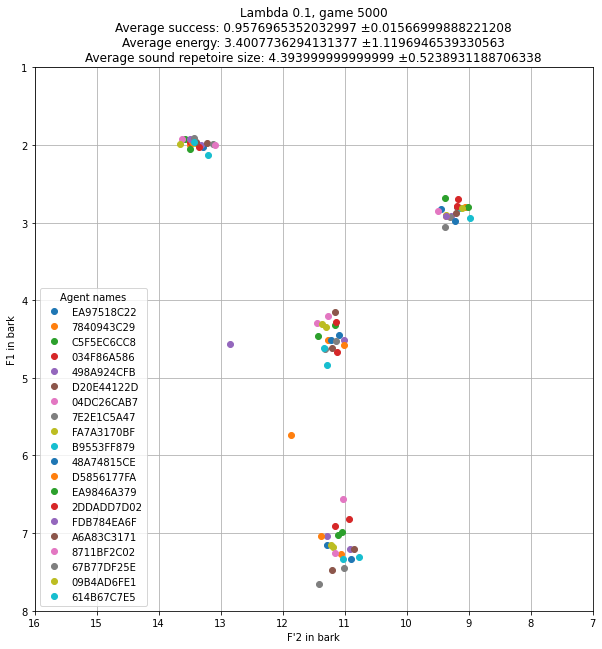

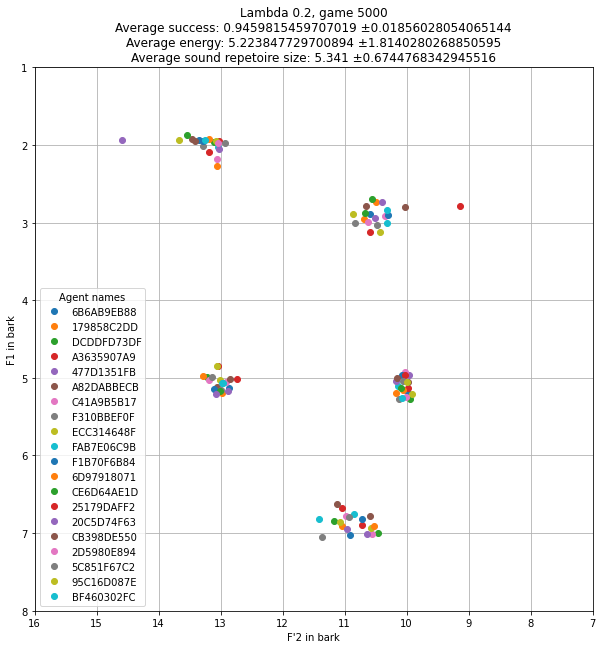

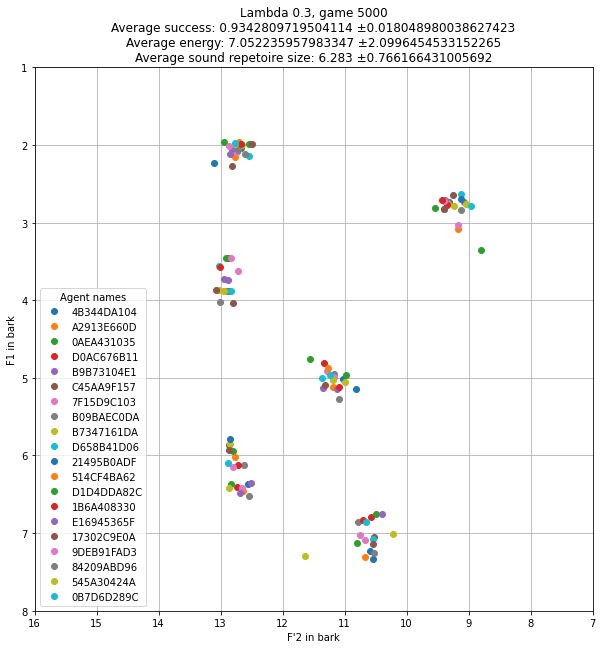

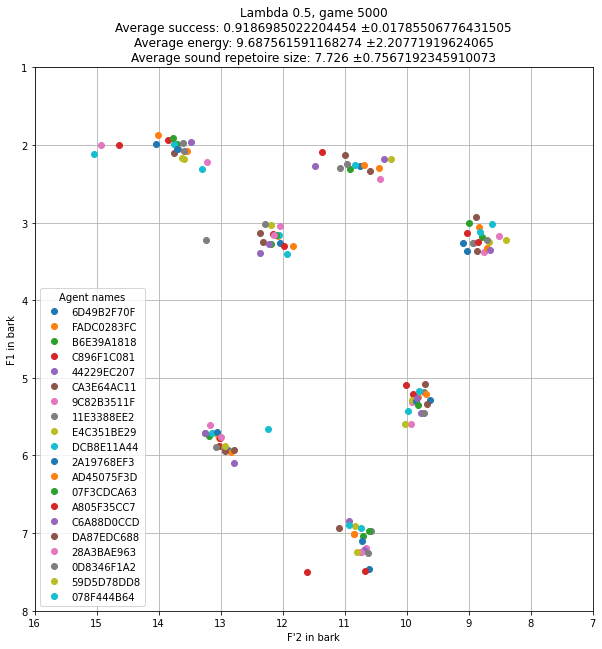

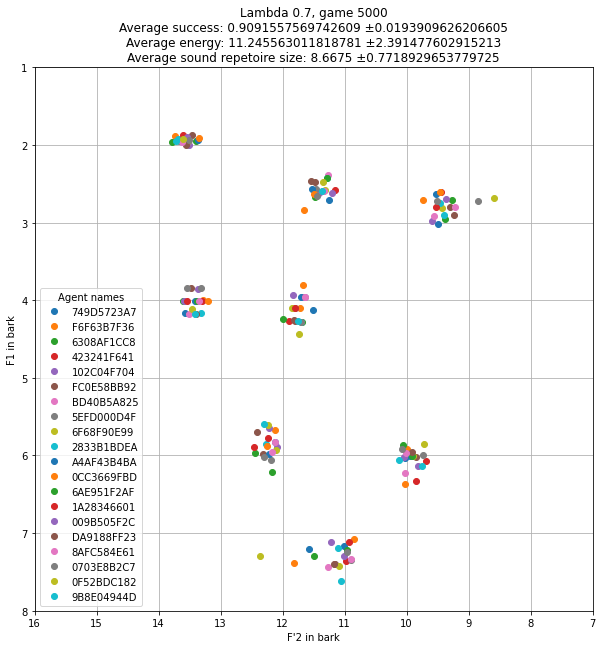

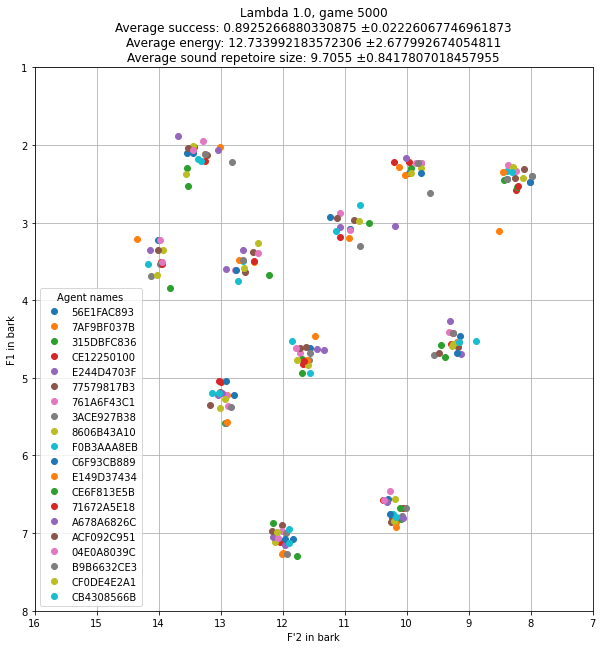

In [16]:
second_formant_weight_parameters = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0];

for second_formant_weight_parameter in second_formant_weight_parameters:
    # Create statistics
    statistics = Statistics(bark_operator= BarkOperator(second_formant_weight = second_formant_weight_parameter));
    
    # Get saved experiment result from file
    with open(f"saved_variables/2/lambda-testing/2-lambda-{second_formant_weight_parameter}.pickle", 'rb') as f:
        results = pickle.load(f);

    # Get success, vowel size and energy mean + std
    [avg_success, std_success] = statistics.average_agent_success_ratio(results);
    [avg_sound_size, std_sound_size] = statistics.average_agent_sound_size(results);
    [avg_energy, std_energy] = statistics.average_agent_energy(results);

    # Plot Game state with statistics title
    sample = 90;
    results[sample].plot(f"Lambda {second_formant_weight_parameter}, game {results[sample].iteration}\nAverage success: {avg_success} ±{std_success}\nAverage energy: {avg_energy} ±{std_energy}\nAverage sound repetoire size: {avg_sound_size} ±{std_sound_size}");




# Delete unused variables
del f;
del second_formant_weight_parameters;
del second_formant_weight_parameter;
del statistics;
del avg_success;
del avg_energy;
del avg_sound_size;
del std_success;
del std_sound_size;
del std_energy;
del results;
del sample;

<hr>

### Population size impact

- Change population size and related parameters as follows:
   - 2 agents | 0.1 change semi-random sound add | 500 iterations
   - 5 agents | 0.04 change semi-random sound add | 1250 iterations
   - 10 agents | 0.02 change semi-random sound add | 2500 iterations
   - 20 agents | 0.01 change semi-random sound add | 5000 iterations
   - 50 agents | 0.004 change semi-random sound add | 12500 iterations
   - 100 agents | 0.002 change semi-random sound add | 25000 iterations

In [17]:
if False: # use old results per default
    population_sizes = [2, 5, 10, 20, 50, 100];
    random_new_sound_odds = [0.1, 0.04, 0.02, 0.01, 0.004, 0.002];
    size_dependent_iterations = [500, 1250, 2500, 5000, 12500, 25000];

    for i in range(len(population_sizes)):
        trials = 100;
        results_250 = [None] * trials;
        results_350 = [None] * trials;
        results_450 = [None] * trials;

        # Use best matching result variables to configure game
        number_of_agents = population_sizes[i]; # Test differing 
        iterations = size_dependent_iterations[i]; # Test differing 

        agent_phoneme_step_size = 0.025; # Modified from 0.1
        agent_sound_threshold_game = 0.5;
        agent_sound_threshold_self = 0.7;
        agent_sound_minimum_tries = 5;
        agent_new_sound_probability = random_new_sound_odds[i]; # Test differing 

        max_noise_ambient = 0.1;

        critical_distance = 3.5;
        second_formant_weight = 0.3; 

        synthesizer = Synthesizer(max_noise_ambient = max_noise_ambient);
        bark_operator = BarkOperator(critical_distance = critical_distance, second_formant_weight = second_formant_weight);

        # Perform 100 trials
        for trial in range(trials):
            # Create new game engine
            game_engine = GameEngine(number_of_agents= number_of_agents, iterations= iterations,
                                        synthesizer= synthesizer, bark_operator= bark_operator, 
                                        agent_phoneme_step_size= agent_phoneme_step_size,
                                        agent_sound_threshold_game= agent_sound_threshold_game,
                                        agent_sound_threshold_self= agent_sound_threshold_self,
                                        agent_sound_minimum_tries= agent_sound_minimum_tries,
                                        agent_new_sound_probability= agent_new_sound_probability);

            # Save result at 250, 350 and 450 'per agent'
            # 250 per agent = 250/2 * population size
            # 350 per agent = 350/2 * population size
            # 450 per agent = 450/2 * population size
            checkpoints = [math.ceil((250/2)*population_sizes[i]), math.ceil((350/2)*population_sizes[i]), math.ceil((450/2)*population_sizes[i]) ];

            # Save result
            results = game_engine.play_imitation_game(checkpoints)
            results_250[trial] = results[0];
            results_350[trial] = results[1];
            results_450[trial] = results[2];

            # Print progress
            print(f"Just completed trial: {trial + 1} for population size {population_sizes[i]}     ", end='\r');

        # Store result to file
        with open(f"saved_variables/2/population-size-testing/2-250-popu-{population_sizes[i]}.pickle", 'wb') as f:
            pickle.dump(results_250, f);

        with open(f"saved_variables/2/population-size-testing/2-350-popu-{population_sizes[i]}.pickle", 'wb') as f:
            pickle.dump(results_350, f);

        with open(f"saved_variables/2/population-size-testing/2-450-popu-{population_sizes[i]}.pickle", 'wb') as f:
            pickle.dump(results_450, f);

        # Delete unused variables
        del number_of_agents;
        del iterations;
        del agent_phoneme_step_size;
        del agent_sound_threshold_game;
        del agent_sound_threshold_self;
        del agent_sound_minimum_tries;
        del agent_new_sound_probability;
        del max_noise_ambient;
        del critical_distance;
        del second_formant_weight;
        del synthesizer;
        del bark_operator;
        del game_engine;
        del checkpoints;
        del trial;
        del trials;
        del results;
        del results_250;
        del results_350;
        del results_450;
        del f;

    # Delete unused variables
    del i;
    del population_sizes;
    del random_new_sound_odds;
    del size_dependent_iterations;

We now open the files of the above performed expiriments and plot a sample game together with the statistics.

Avg and std success of 2: 0.9256888888888888 ±0.02070204856565685
Avg and std energy of 2: 5.600973252436656 ±1.899179899469821
Avg and std sounds size of 2: 5.86 ±0.7651143705355429

Avg and std success of 5: 0.9249804689686971 ±0.02193738950587148
Avg and std energy of 5: 5.974045562954736 ±1.6197014938671173
Avg and std sounds size of 5: 5.978 ±0.6118136971333675

Avg and std success of 10: 0.9352391189590725 ±0.01716434377092421
Avg and std energy of 10: 6.6960108023310845 ±1.8110978968437923
Avg and std sounds size of 10: 6.1739999999999995 ±0.6464704169565688

Avg and std success of 20: 0.9304777648361582 ±0.019061365138691402
Avg and std energy of 20: 6.8913557851202345 ±1.9455271710635373
Avg and std sounds size of 20: 6.172999999999999 ±0.7115623655028419

Avg and std success of 50: 0.92747721657457 ±0.019587098562932632
Avg and std energy of 50: 7.2596258160817 ±1.804743951801664
Avg and std sounds size of 50: 6.2624 ±0.644156999496241

Avg and std success of 100: 0.920254123

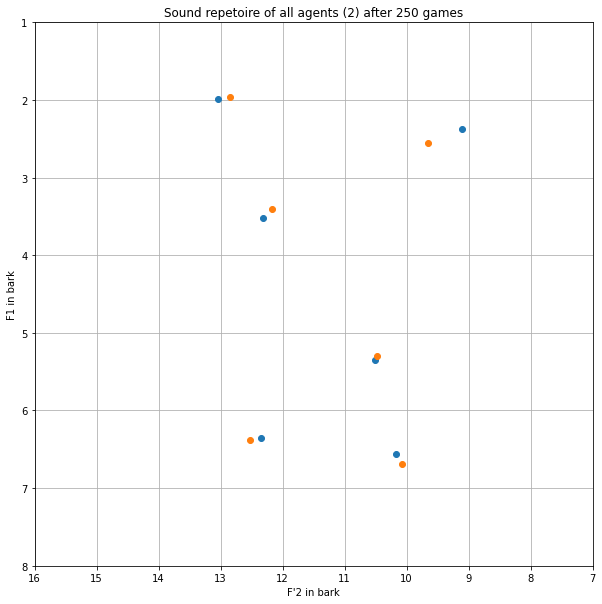

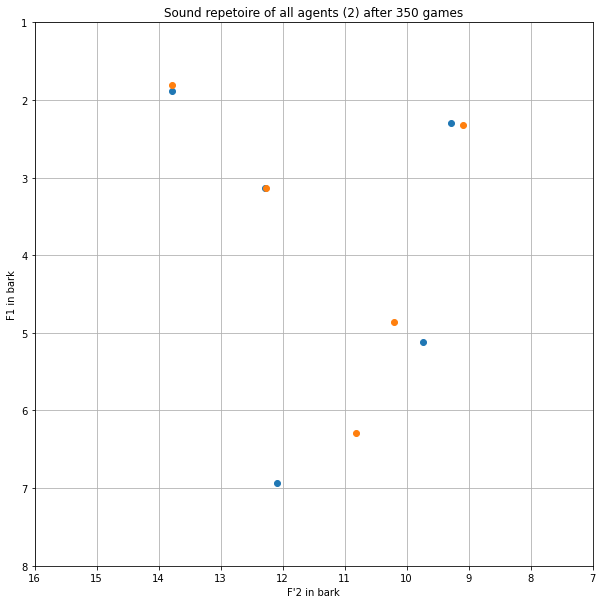

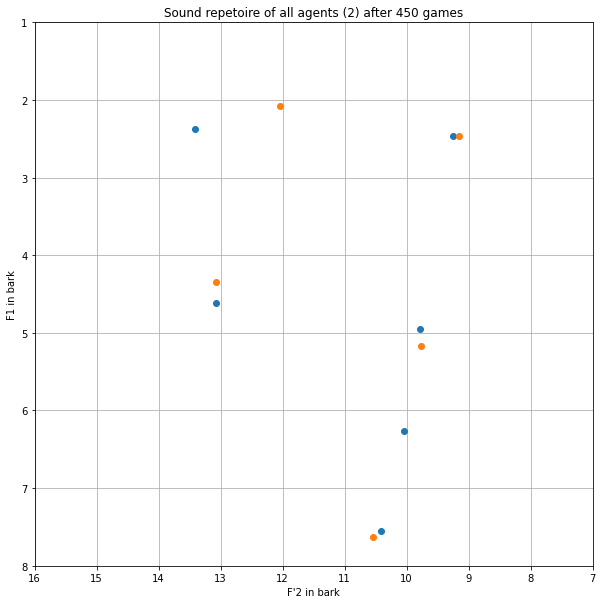

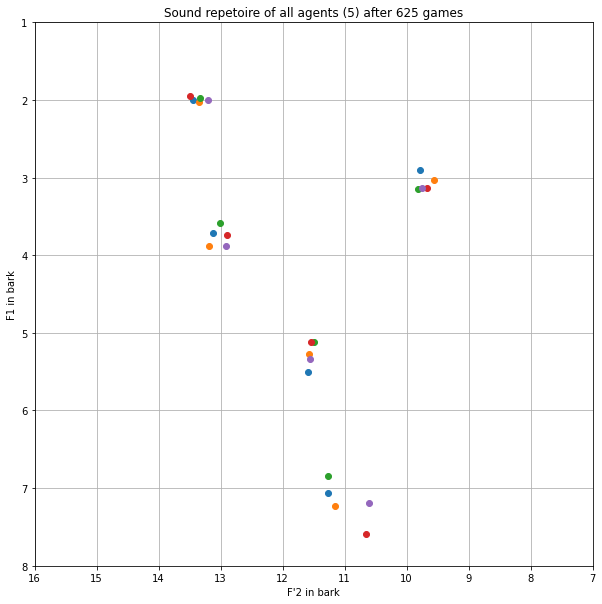

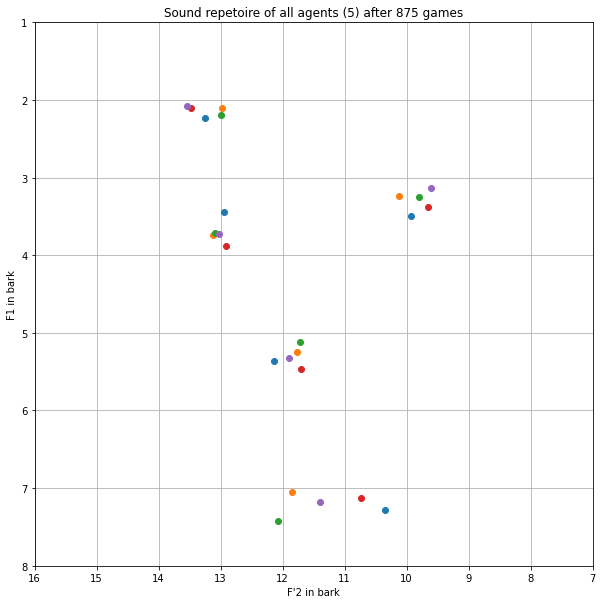

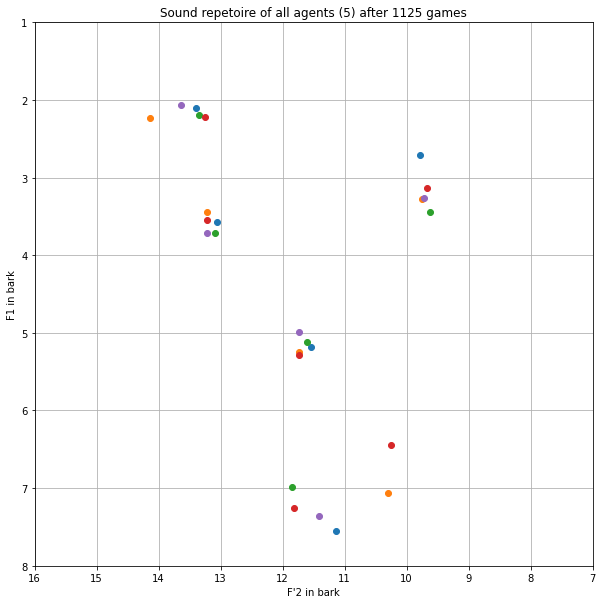

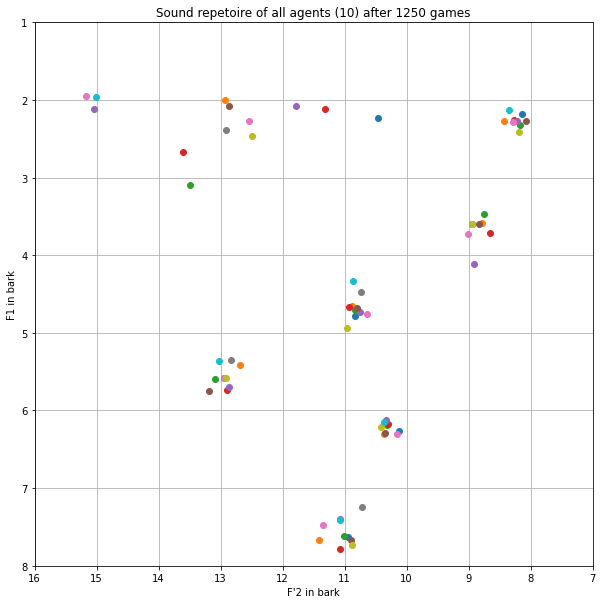

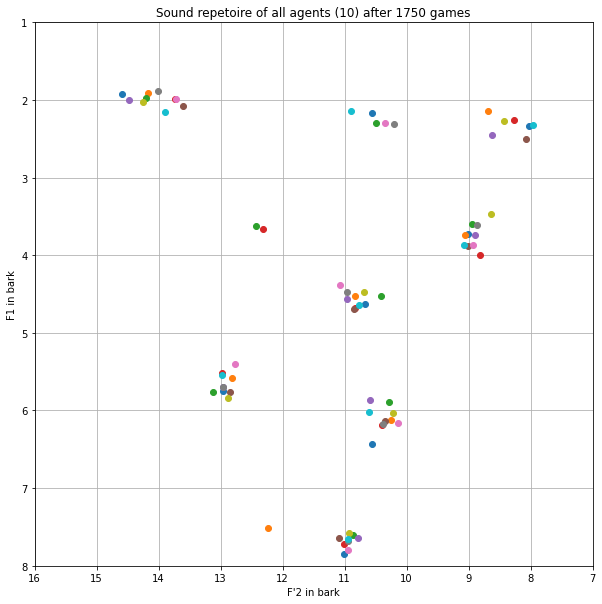

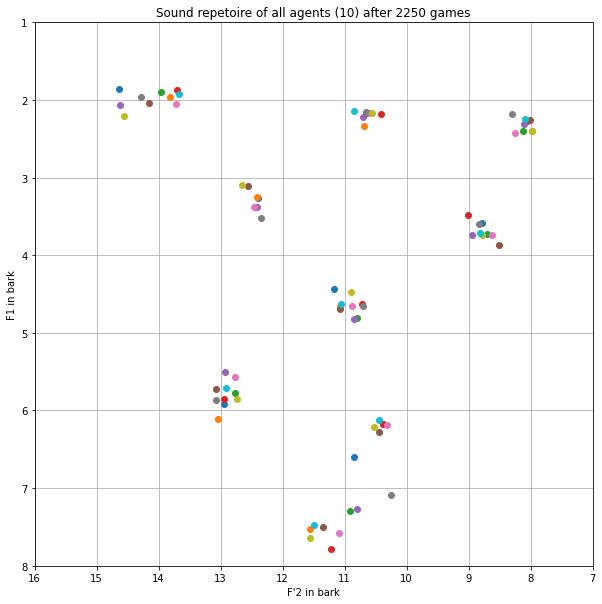

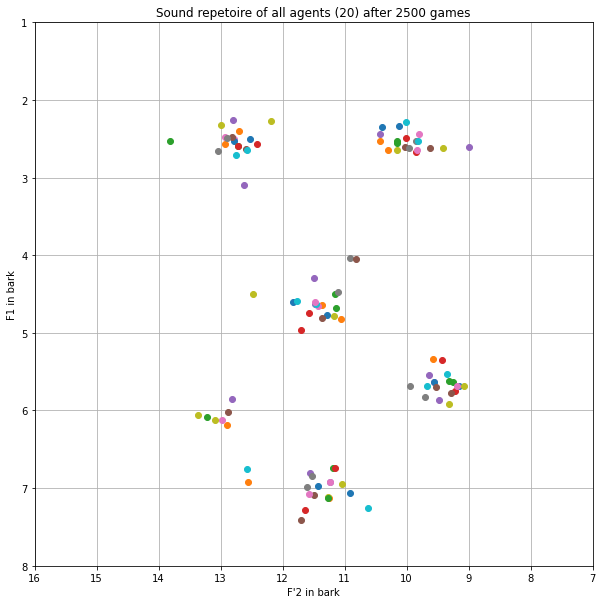

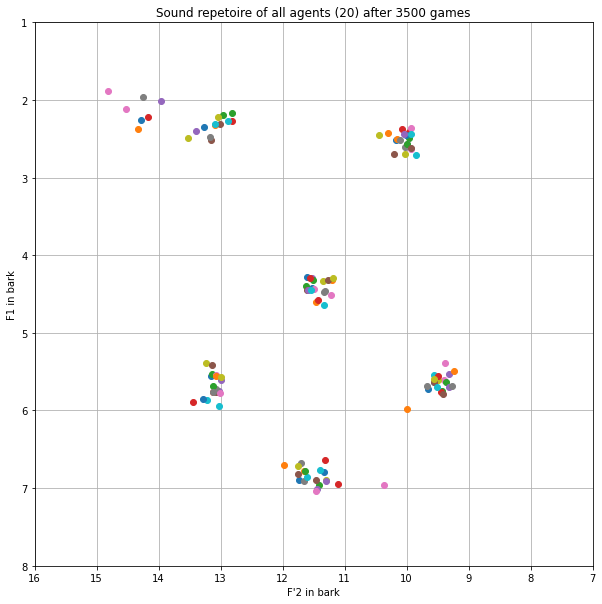

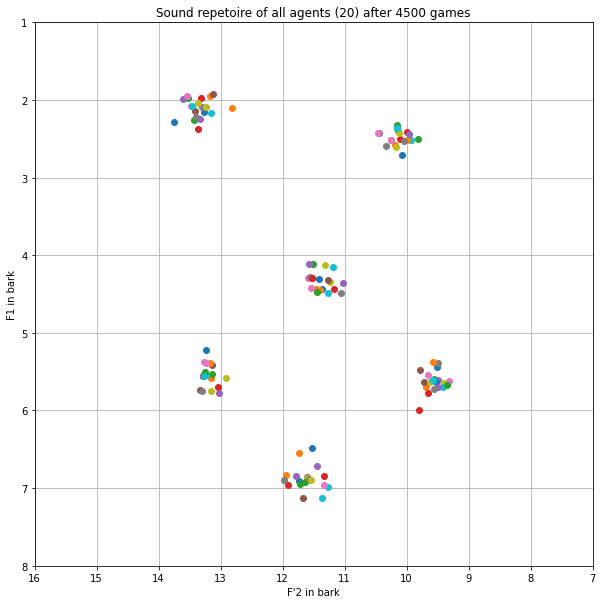

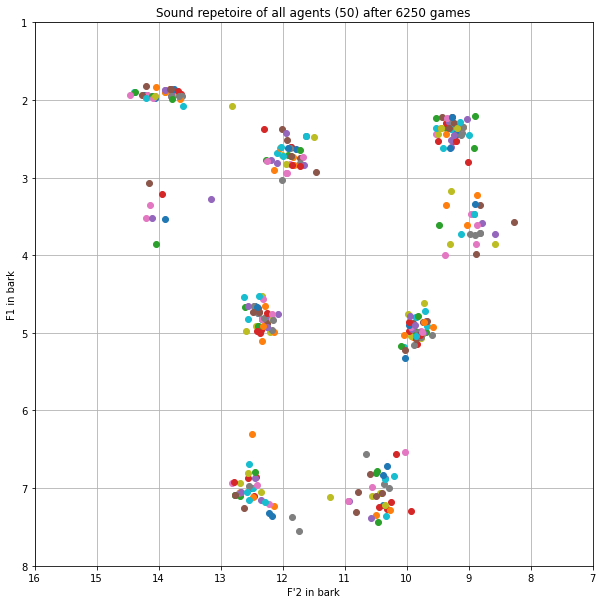

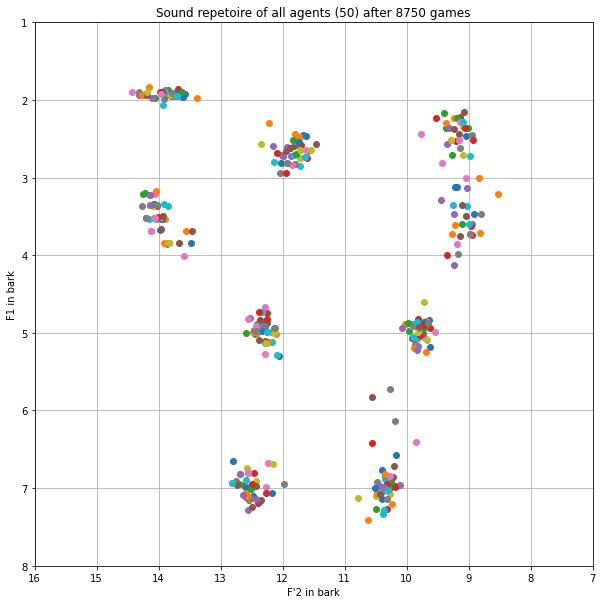

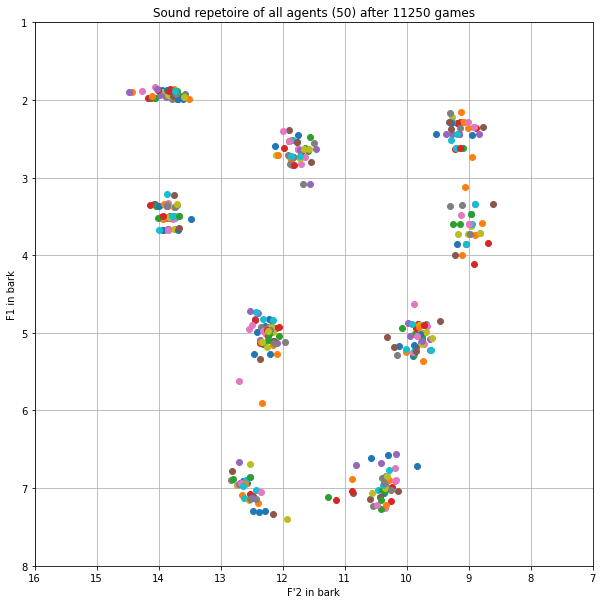

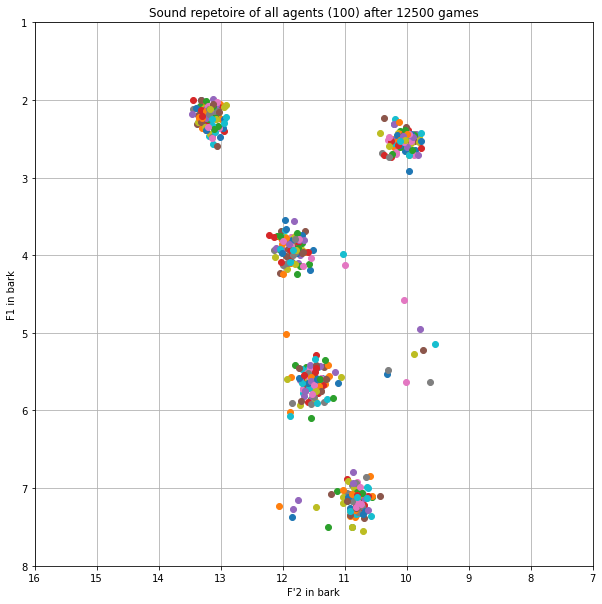

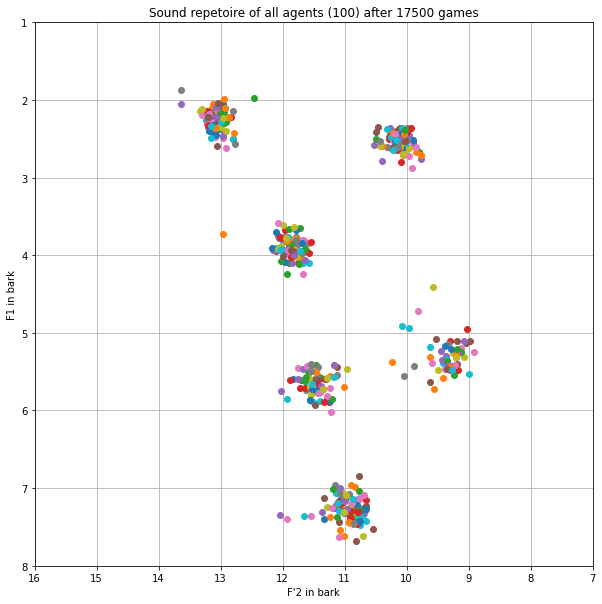

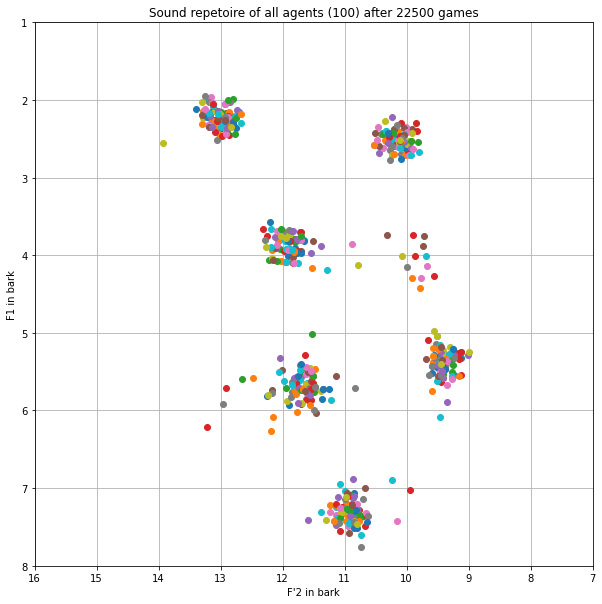

In [18]:
population_sizes = [2, 5, 10, 20, 50, 100];

for i in range(len(population_sizes)):
    # Create statistics
    statistics = Statistics(bark_operator= BarkOperator());
    
    # Get saved experiment result from file        
    with open(f"saved_variables/2/population-size-testing/2-250-popu-{population_sizes[i]}.pickle", 'rb') as f:
        results_250 = pickle.load(f);
        
    with open(f"saved_variables/2/population-size-testing/2-350-popu-{population_sizes[i]}.pickle", 'rb') as f:
        results_350 = pickle.load(f);
        
    with open(f"saved_variables/2/population-size-testing/2-450-popu-{population_sizes[i]}.pickle", 'rb') as f:
        results_450 = pickle.load(f);

    # Get success, vowel size and energy mean + std
    [avg_success, std_success] = statistics.average_agent_success_ratio(results_450);
    [avg_sound_size, std_sound_size] = statistics.average_agent_sound_size(results_450);
    [avg_energy, std_energy] = statistics.average_agent_energy(results_450);

    # Plot Game state with statistics title
    sample = 25;
    
    # Print results
    print(f"Avg and std success of {population_sizes[i]}: {avg_success} ±{std_success}");
    print(f"Avg and std energy of {population_sizes[i]}: {avg_energy} ±{std_energy}");
    print(f"Avg and std sounds size of {population_sizes[i]}: {avg_sound_size} ±{std_sound_size}");
    print();
    
    # Plot result at differing iteration
    results_250[sample].plot(show_legend = False, title=f"Sound repetoire of all agents ({len(results_250[sample].agents)}) after {results_250[sample].iteration} games");
    results_350[sample].plot(show_legend = False, title=f"Sound repetoire of all agents ({len(results_350[sample].agents)}) after {results_350[sample].iteration} games");
    results_450[sample].plot(show_legend = False, title=f"Sound repetoire of all agents ({len(results_450[sample].agents)}) after {results_450[sample].iteration} games");




# Delete unused variables
del f;
del statistics;
del avg_success;
del avg_energy;
del avg_sound_size;
del std_success;
del std_sound_size;
del std_energy;
del results_250;
del results_350;
del results_450;
del sample;
del population_sizes;